Importar dados para phi

In [1]:
import pandas as pd

x=[[],[],[],[],[]]
y = [[],[],[],[],[]]
t = [[],[],[],[],[]]
for i in range(5):
    data = pd.read_csv(f'tracker_{i+2}.txt',sep = "	")
    x[i]=data['x'].values
    y[i]=data['y'].values
    t[i]=data['t'].values

Associar os dados com os verdadeiros valores

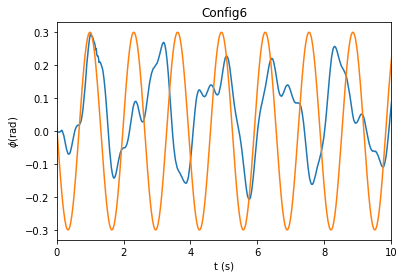

In [15]:
from matplotlib import pyplot as plt
import numpy as np

phi = [np.ones(len(x[0])),
               np.ones(len(x[1])),
                       np.ones(len(x[2])),
                               np.ones(len(x[3])),
                                       np.ones(len(x[4]))]
for i in range(5):
    
    for j in range(len(x[i])):
        phi[i][j]=np.arctan(x[i][j]/y[i][j])

        
plt.plot(t[1],phi[1])
plt.plot(t[1],0.3*np.cos(4.8*t[1]+1.5))
plt.xlim(0,10)
plt.ylabel('$\phi$(rad)')
plt.xlabel('t (s)')
plt.title('Config6')
plt.show()

Importar dados de Theta

In [3]:
x1 = [[],[],[],[],[],[]]#tempos
y1 = [[],[],[],[],[],[]]#angulos

for i in range(6):
    data = pd.read_csv(f'Dados\com_pesos_1_angulo_{i+1}.txt', sep = "	")
    y1[i] = data['Posicao angular ( rad )'].values
    x1[i] = data['Tempo ( s )'].values


Inventar função para printar frequencias de máximo, para usa-la é necessário colocar a lista de tempos, frequencias e da transformada

In [4]:
def printfourier(t,f,X):
    g = np.sort(np.abs(X))
    F = 0
    n=0
    find=True
    j=1
    while find==True:
        for i in range(len(X)):
            if np.abs(X[i])== g[len(X)-j] and freq[i]>0:
                F+= freq[i]*np.abs(X[i])
                n+=np.abs(X[i])
                find=False
                break
        j+=1
    return F/n*2*np.pi

Utilizar essa função para printar as frequencias para os movimentos de theta

D:\Program_Files\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


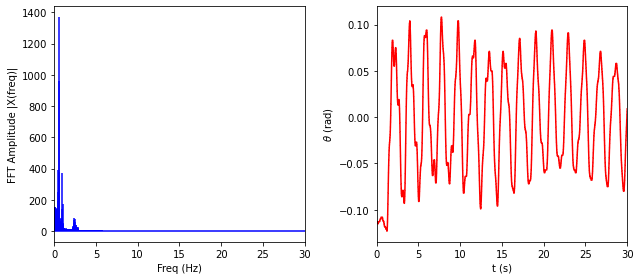

Config1
3.2672698794708173


D:\Program_Files\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


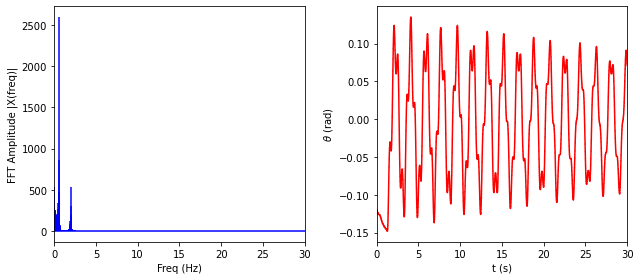

Config2
3.4129197757629472


D:\Program_Files\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


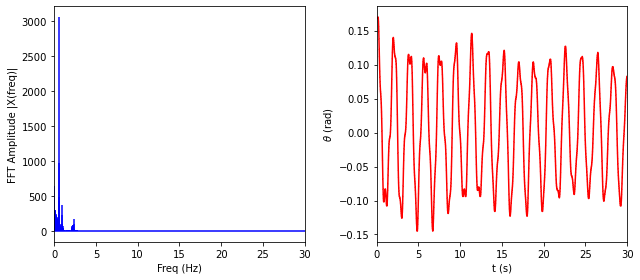

Config3
3.3337536321833348


D:\Program_Files\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


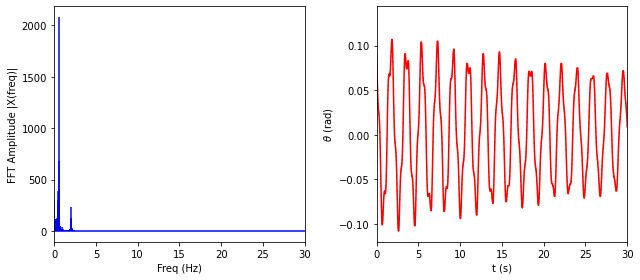

Config4
3.4009830117556152


D:\Program_Files\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


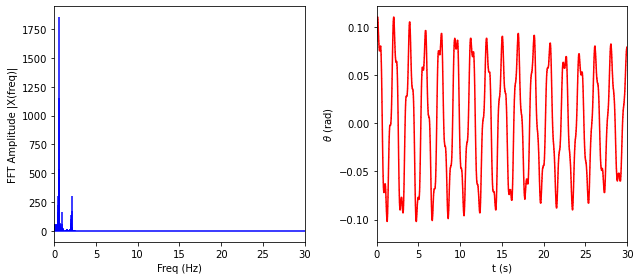

Config5
3.3460072827168226


D:\Program_Files\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


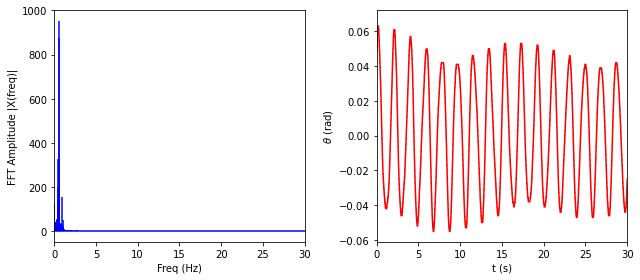

Config6
3.252958649715342
Média
3.3356487052674804
0.24569287280167545


In [5]:
from numpy.fft import fft, ifft
f=[]
for i in range(len(x1)):
    sr = 1000
    X = fft(y1[i])
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T 

    plt.figure(figsize = (9, 4))
    plt.subplot(121)

    plt.stem(freq, np.abs(X), 'b', \
             markerfmt=" ", basefmt="-b")
    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT Amplitude |X(freq)|')
    plt.xlim(0, 30)

    plt.subplot(122)
    plt.plot(x1[i]-3.7, ifft(X), 'r')
    plt.xlabel('t (s)')
    plt.ylabel('$\\theta$ (rad)')
    plt.xlim(0,30)
    plt.tight_layout()
    plt.show()
#Aqui plota frequenciAas
    sr = 1000
    X = fft(y1[i])
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T 
    print(f'Config{i+1}')
    f.append(printfourier(x1[i],freq,X))
    print(printfourier(x1[i],freq,X))
print("Média")
print(np.average(f))
print(np.sqrt(np.std(f)))

utilizar função para printar as frequencias de phi

D:\Program_Files\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


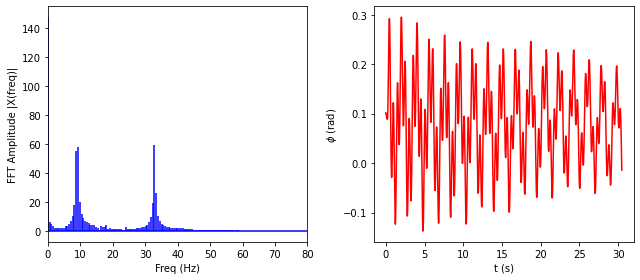

Config1
58.46423110128788


D:\Program_Files\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


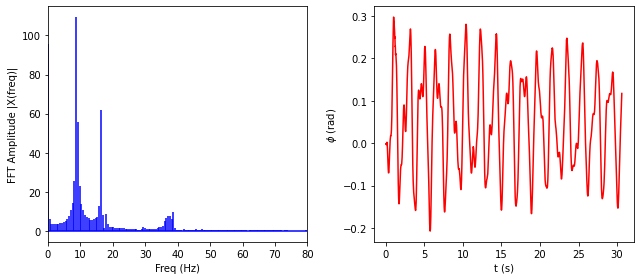

Config2
54.81513899393314


D:\Program_Files\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


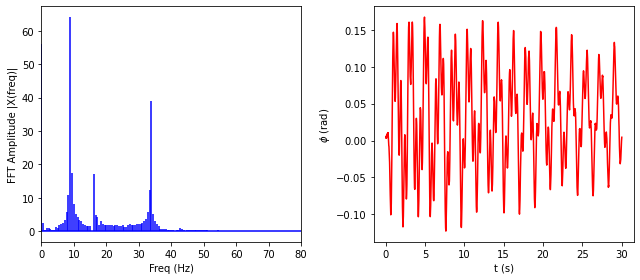

Config3
55.850536063818545


D:\Program_Files\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


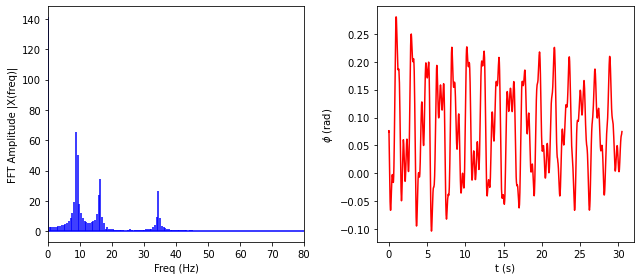

Config4
54.995057393256765


D:\Program_Files\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


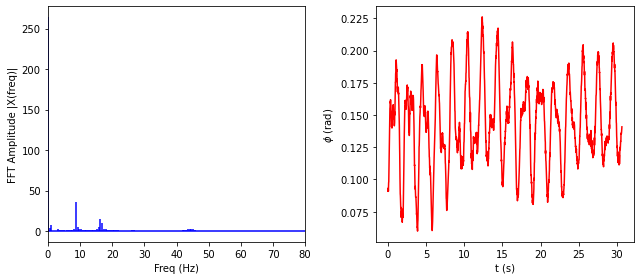

Config5
54.69584598197681
55.764161906854625
1.187159347994426


In [57]:
from numpy.fft import fft, ifft
ft=[]
for i in range(len(t)):
    sr = 1000
    X = fft(phi[i])
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T 

    plt.figure(figsize = (9, 4))
    plt.subplot(121)

    plt.stem(freq, np.abs(X), 'b', \
             markerfmt=" ", basefmt="-b")
    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT Amplitude |X(freq)|')
    plt.xlim(0, 80)

    plt.subplot(122)
    plt.plot(t[i], ifft(X), 'r')
    plt.xlabel('t (s)')
    plt.ylabel('$\\phi$ (rad)')
    plt.tight_layout()
    plt.show()
#Aqui plota frequenciAas
    sr = 1000
    X = fft(phi[i])
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T 
    print(f'Config{i+1}')
    print(printfourier(t[i],freq,X))
    ft.append(printfourier(t[i],freq,X))
print("Média")
print(np.average(ft))
print(np.sqrt(np.std(ft)))

Aqui tentei fazer somatório dessas frequencias para achar função que fitasse reta

D:\Program_Files\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


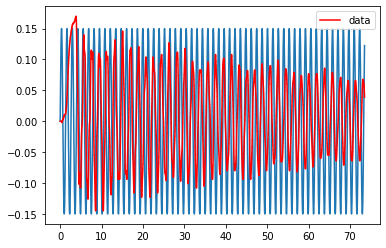

In [7]:
#FMax =freq[np.argmax(abs(X))]
#g = np.sort(np.abs(X))

#for i in range(len(X)):
#    if np.abs(X[i])== g[len(X)-3]:
#        FMax2= freq[i]
sr = 1000
X = fft(y1[2])
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 
    

def fourier(t,f,X):
    g = np.sort(np.abs(X))
    F = 0
    A=0.2
    Xmax=max(np.abs(X))
    for j in range(1,100):
        for i in range(len(X)):
            if np.abs(X[i]) == g[len(X)-j] and freq[i]<100:
                FMax2= freq[i]
                break
        F+=0.061*(np.abs(X[i]))/((j*2*1000))*np.sin(FMax2*(2*np.pi)*t)
    return F

#plt.plot(x1[2],fourier(x1[2],freq,X))  
plt.plot(x1[2],0.15*np.sin(4.8*x1[2]))
#plt.plot(x1[2],0.2*np.sin(FMax*(2*np.pi)*x1[2])+0.12*np.sin(FMax2*(2*np.pi)*x1[2]))
plt.plot(x1[2], ifft(X), 'r',label="data")
plt.legend()
plt.show()

Importar dados da simulação feita com Mathematica

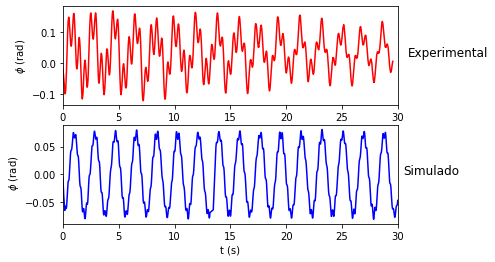

In [19]:
import pandas as pd

nd=[]
ndt = []

data = pd.read_csv(f'datasthe.txt',sep = " ")
nd=data['t'].values
ndt=data['theta'].values
from matplotlib import pyplot as plt

from scipy.signal import lfilter
from numpy import*

n = 19  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b, a, ndt)

fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(t[2]-0.45, phi[2], 'r')
ax1.set(xlabel = 't', ylabel = '$\\phi$ (rad)')
ax1.set_title('Experimental',  x = 1.15,y=0.7, pad= -20)
ax1.set_xlim(0,30)
ax2.plot(nd, yy, 'b', )
ax2.set(xlabel ='t (s)', ylabel = ' $\\phi$ (rad)')
ax2.set_title('Simulado', x = 1.1,y=0.7, pad= -20)
ax2.set_xlim(0,30)

#plt.plot(nd,yy,color='orange',label='Simulado')
#plt.plot(t[2],phi[2],color='blue',label='Experimental')

plt.show()

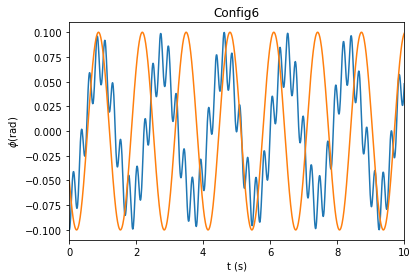

In [31]:
plt.plot(nd,ndt)
plt.plot(nd,0.1*np.cos(4.8*nd+2.1))
plt.xlim(0,10)
plt.ylabel('$\phi$(rad)')
plt.xlabel('t (s)')
plt.title('Config6')
plt.show()

Analisar theta, mas não lembro qual era a config de theta

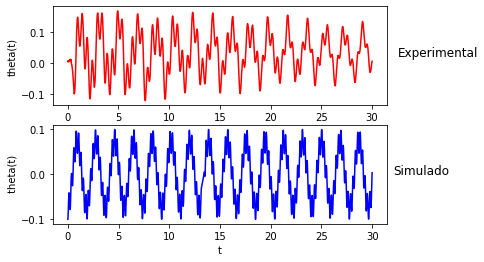

<Figure size 1080x576 with 0 Axes>

In [8]:
import pandas as pd

nd=[]
ndt = []

data = pd.read_csv(f'datasthe.txt',sep = " ")
nd=data['t'].values
ndt=data['theta'].values
from matplotlib import pyplot as plt

from scipy.signal import lfilter
from numpy import*

n = 17  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b, a, ndt)


fig, (ax1, ax2) = plt.subplots(2, 1)
plt.figure(figsize=(15,8))
ax1.plot(t[2], phi[2], 'r')
ax1.set(xlabel = 't', ylabel = 'theta(t)')
ax1.set_title('Experimental',  x = 1.15,y=0.7, pad= -20)

ax2.plot(nd, ndt, 'b', )
ax2.set(xlabel ='t', ylabel = ' theta(t)')
ax2.set_title('Simulado', x = 1.1,y=0.7, pad= -20)


#plt.plot(nd,yy,color='orange',label='Simulado')
#plt.plot(t[2],phi[2],color='blue',label='Experimental')

plt.show()

D:\Program_Files\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


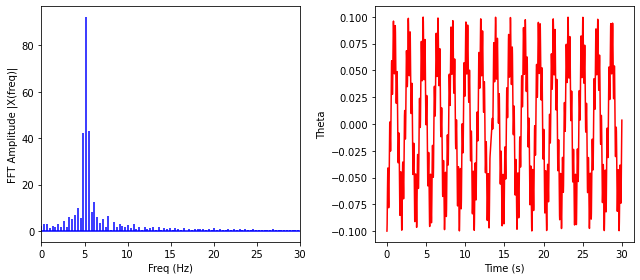

5.181347150259067
5.181347150259067
5.505181347150259
5.505181347150259


0

In [74]:
from numpy.fft import fft, ifft

sr = 1000
X = fft(ndt)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (9, 4))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 30)

plt.subplot(122)
plt.plot(nd, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Theta')
plt.tight_layout()
plt.show()

def printfourier(t,f,X):
    g = np.sort(np.abs(X))
    F = 0
    A=0.2
    Xmax=max(np.abs(X))
    for j in range(1,5):
        for i in range(len(X)):
            if np.abs(X[i])== g[len(X)-j]:
                FMax2= freq[i]
                print(freq[i])
                break
    return F
printfourier(nd,freq,X)